In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from skimage import io, color

import torch
from torch.utils.data  import Dataset, DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [3]:
# Specify the directory name
new_folder = 'img_png'

# Create the directory
os.makedirs(new_folder, exist_ok=True)

# Verify the creation
if os.path.isdir(new_folder):
    print(f"Folder '{new_folder}' created successfully!")
else:
    print(f"Failed to create the folder '{new_folder}'.")

Folder 'img_png' created successfully!


In [4]:
from PIL import Image
import os

# Directory containing JPEG images
jpg_dir = '/kaggle/input/teeth-segmentation-on-dental-x-ray-images/Teeth Segmentation JSON/d2/img'

# Directory where PNG images will be saved
png_dir = '/kaggle/working/img_png'

# Create the PNG directory if it doesn't exist
os.makedirs(png_dir, exist_ok=True)

# List all JPEG files in the directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg') or f.endswith('.jpeg')]

# Iterate over each JPEG file and convert it to PNG
for jpg_file in jpg_files:
    # Open the JPEG image
    jpg_path = os.path.join(jpg_dir, jpg_file)
    image = Image.open(jpg_path)

    # Construct the corresponding PNG file path
    png_file = os.path.splitext(jpg_file)[0] + '.png'
    png_path = os.path.join(png_dir, png_file)

    # Convert and save the image as PNG
    image.save(png_path, 'PNG')
    print(f"Converted {jpg_file} to {png_file}")

Converted 208.jpg to 208.png
Converted 473.jpg to 473.png
Converted 333.jpg to 333.png
Converted 537.jpg to 537.png
Converted 45.jpg to 45.png
Converted 369.jpg to 369.png
Converted 56.jpg to 56.png
Converted 89.jpg to 89.png
Converted 20.jpg to 20.png
Converted 275.jpg to 275.png
Converted 212.jpg to 212.png
Converted 239.jpg to 239.png
Converted 58.jpg to 58.png
Converted 150.jpg to 150.png
Converted 6.jpg to 6.png
Converted 109.jpg to 109.png
Converted 149.jpg to 149.png
Converted 187.jpg to 187.png
Converted 521.jpg to 521.png
Converted 436.jpg to 436.png
Converted 76.jpg to 76.png
Converted 539.jpg to 539.png
Converted 355.jpg to 355.png
Converted 516.jpg to 516.png
Converted 71.jpg to 71.png
Converted 474.jpg to 474.png
Converted 501.jpg to 501.png
Converted 342.jpg to 342.png
Converted 429.jpg to 429.png
Converted 544.jpg to 544.png
Converted 377.jpg to 377.png
Converted 272.jpg to 272.png
Converted 270.jpg to 270.png
Converted 182.jpg to 182.png
Converted 215.jpg to 215.png
Con

In [5]:
folder_name = "mask_bw"

path = "/kaggle/working/" + folder_name

os.makedirs(path, exist_ok=True)

In [6]:
import os
import json
import cv2
import numpy as np

# Create directories for output masks
output_folder = '/kaggle/working/mask_bw'
os.makedirs(output_folder, exist_ok=True)

def json_to_mask(json_folder, output_folder, image_shape):
    # List all files in the json folder
    json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

    for json_file in json_files:
        json_path = os.path.join(json_folder, json_file)

        # Read JSON file
        with open(json_path, 'r') as file:
            data = json.load(file)

        # Extract the coordinates
        # Assuming data has the format {'objects': [{'points': {'exterior': [[x1, y1], [x2, y2], ...]}}, ...]}
        coordinates = []
        for obj in data.get('objects', []):
            if 'points' in obj and 'exterior' in obj['points']:
                coordinates.append(np.array(obj['points']['exterior'], dtype=np.int32))

        # Create a white mask image
        mask = np.ones(image_shape, dtype=np.uint8) * 255

        # Draw each object with a thin line around it
        for polygon in coordinates:
            cv2.fillPoly(mask, [polygon], color=(0))  # Fill the inside of the polygon with black
            cv2.polylines(mask, [polygon], isClosed=True, color=(255), thickness=3)  # Draw the border of the polygon in white

        # Invert colors
        mask = cv2.bitwise_not(mask)

        # Save the mask image
        mask_filename = os.path.splitext(os.path.splitext(json_file)[0])[0]  # Get the base name without any extension
        mask_path = os.path.join(output_folder, mask_filename + ".png")  # Ensure the extension is .png
        cv2.imwrite(mask_path, mask)

# Example usage
json_folder = '/kaggle/input/teeth-segmentation-on-dental-x-ray-images/Teeth Segmentation JSON/d2/ann'  # Adjust this path based on your dataset path
image_shape = (1024, 2041)  # Replace with the dimensions of your images
json_to_mask(json_folder, output_folder, image_shape)

# Check the output
os.listdir(output_folder)

['86.png',
 '4.png',
 '219.png',
 '132.png',
 '555.png',
 '283.png',
 '56.png',
 '380.png',
 '161.png',
 '479.png',
 '385.png',
 '188.png',
 '359.png',
 '306.png',
 '519.png',
 '130.png',
 '549.png',
 '268.png',
 '397.png',
 '28.png',
 '250.png',
 '301.png',
 '389.png',
 '63.png',
 '254.png',
 '181.png',
 '255.png',
 '495.png',
 '138.png',
 '61.png',
 '451.png',
 '399.png',
 '192.png',
 '508.png',
 '357.png',
 '160.png',
 '37.png',
 '196.png',
 '242.png',
 '177.png',
 '236.png',
 '436.png',
 '408.png',
 '146.png',
 '300.png',
 '153.png',
 '590.png',
 '355.png',
 '444.png',
 '73.png',
 '317.png',
 '464.png',
 '65.png',
 '581.png',
 '3.png',
 '595.png',
 '513.png',
 '172.png',
 '297.png',
 '126.png',
 '343.png',
 '201.png',
 '376.png',
 '424.png',
 '266.png',
 '532.png',
 '33.png',
 '70.png',
 '412.png',
 '425.png',
 '516.png',
 '316.png',
 '278.png',
 '570.png',
 '26.png',
 '99.png',
 '460.png',
 '452.png',
 '365.png',
 '596.png',
 '5.png',
 '333.png',
 '47.png',
 '11.png',
 '375.png',


/tmp/ipykernel_34/2551643299.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img1=ress1.resize((1540,640), Image.ANTIALIAS)
/tmp/ipykernel_34/2551643299.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img2=ress2.resize((1540,640), Image.ANTIALIAS)


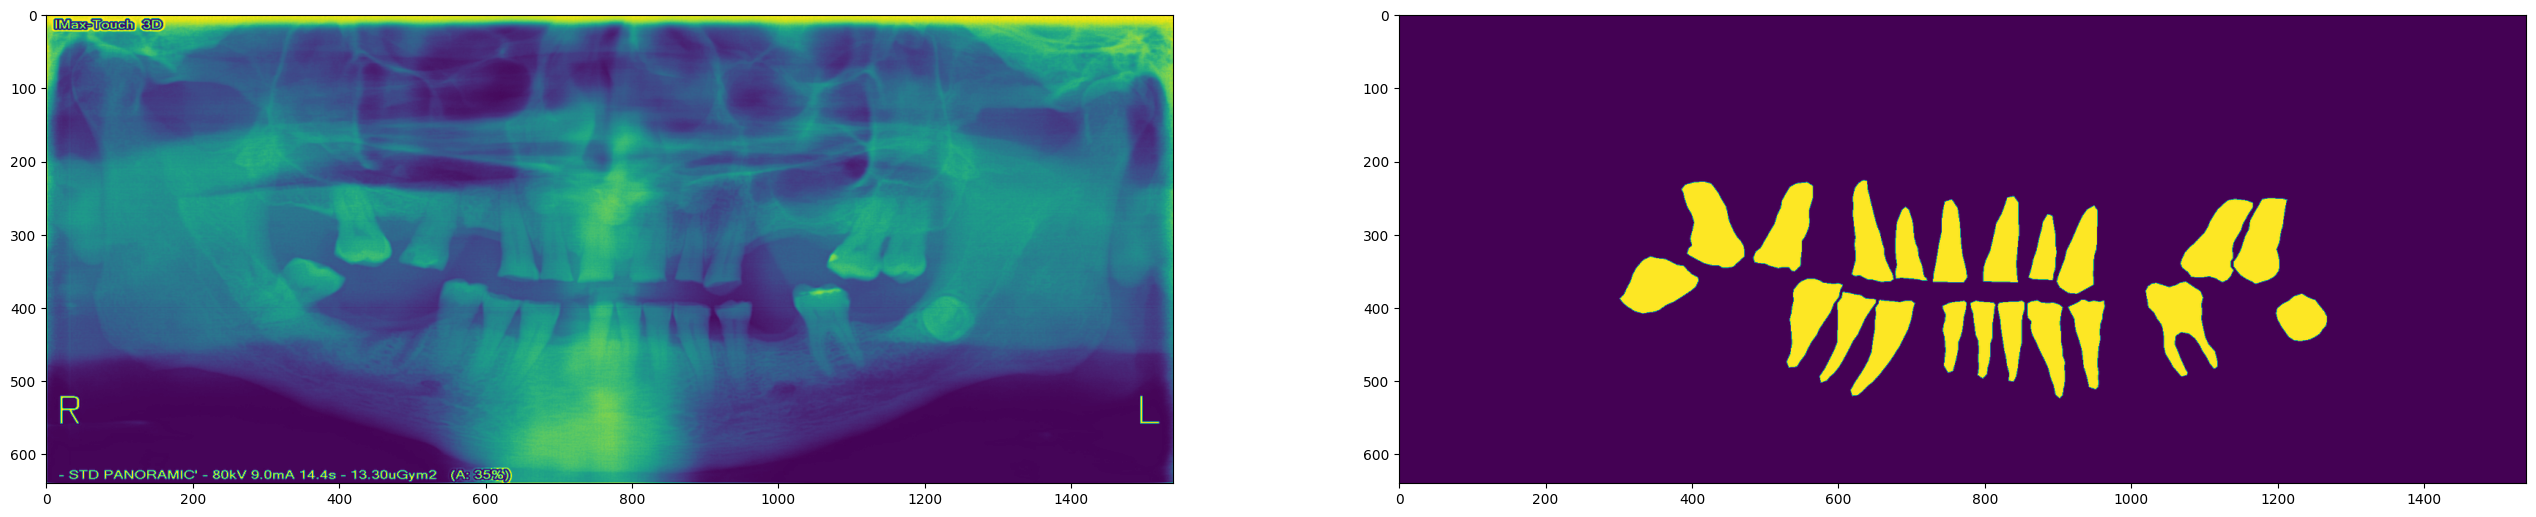

In [7]:
ress1=Image.open('/kaggle/working/img_png/1.png')
ress2=Image.open('/kaggle/working/mask_bw/1.png')
img1=ress1.resize((1540,640), Image.ANTIALIAS)
img2=ress2.resize((1540,640), Image.ANTIALIAS)

fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(2, 2, 1)
plt.imshow(img1)
ax = fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.show()

In [8]:
def pre_images(resize_shape,path):
    img=Image.open(path)
    img=img.resize((resize_shape),Image.ANTIALIAS)
    img=convert_one_channel(np.asarray(img))
    cv2.imwrite(path,img)
    return img

def resize(resize_shape,path):
    img=Image.open(path)
    # w,h=np.array(img).shape
    # print(w,h)
      # print(img.size)
    img=img.resize((resize_shape),Image.ANTIALIAS)
    return img
def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

/tmp/ipykernel_34/547741723.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img=img.resize((resize_shape),Image.ANTIALIAS)
/tmp/ipykernel_34/547741723.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img=img.resize((resize_shape),Image.ANTIALIAS)


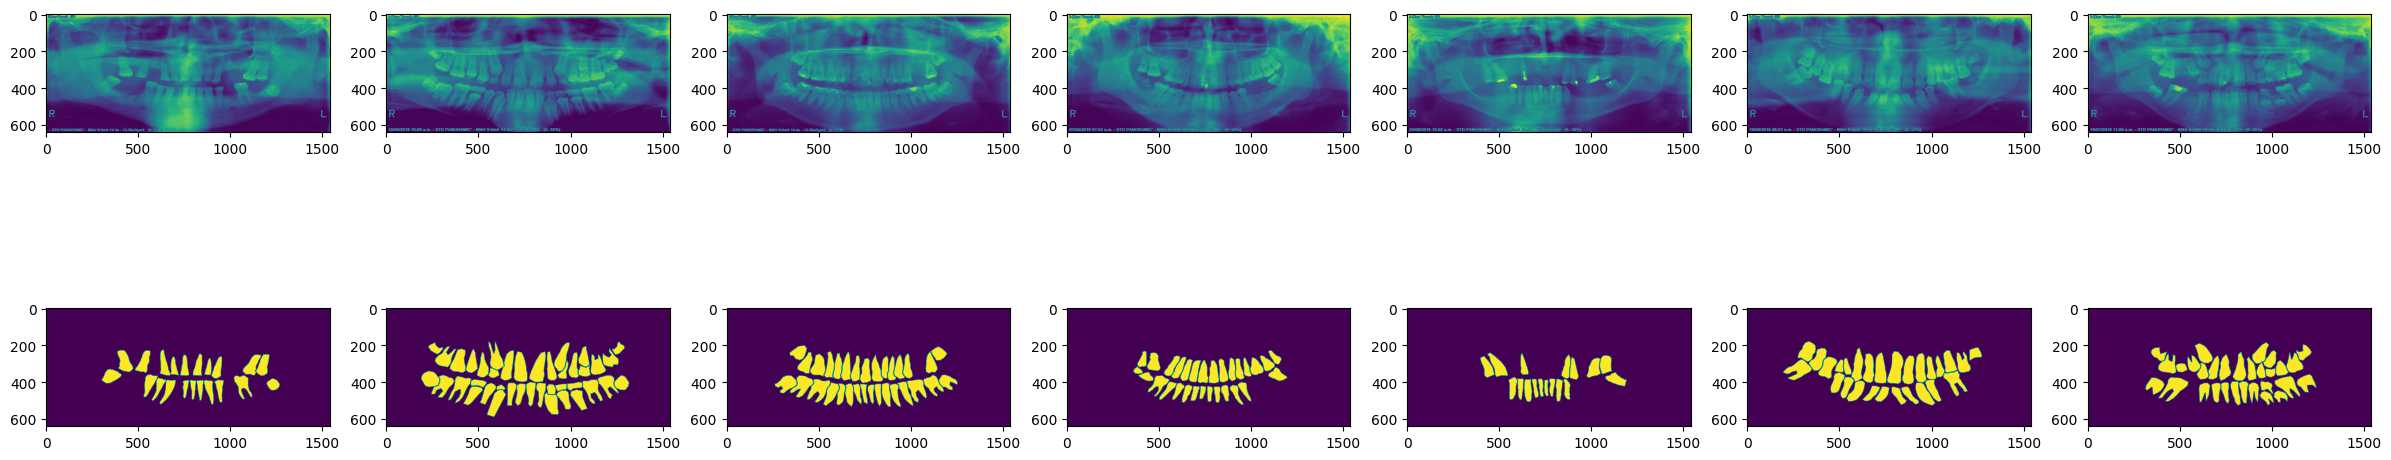

In [9]:
fig = plt.figure(figsize = (30,7))
for index in range(7):
  file_path1 = os.path.join('/kaggle/working/img_png', str(index+1)+'.png')
  file_path2 = os.path.join('/kaggle/working/mask_bw', str(index+1)+'.png')
  # print(file_path2)
  ax = fig.add_subplot(2, 7, index+1)
  plt.imshow(pre_images((1540,640),file_path1))  #show result of converting every img to one color channel
  # plt.imshow(cv2.imread(file_path1))

  ax = fig.add_subplot(2, 7, index+8)
  plt.imshow(resize((1540,640),file_path2))
  # plt.imshow(cv2.imread(file_path2))
plt.show()

In [10]:
folder_name = "data"

path = "/kaggle/working/" + folder_name

os.makedirs(path, exist_ok=True)

In [11]:
arr1=np.arange(1,599)
print(arr1.dtype)
arr1=arr1.astype(str)
print(type(arr1))
df=pd.DataFrame(arr1)
df[1]=df[0]
df[0]=df[0]+'.png'
df.to_csv('/kaggle/working/data/sample.csv',index=False)

int64
<class 'numpy.ndarray'>


In [12]:
folder_name = "original_img"

path = "/kaggle/working/data/" + folder_name

os.makedirs(path, exist_ok=True)

In [13]:
folder='/kaggle/working/mask_bw'
for file_name in os.listdir(folder):
    source = folder+'/'+file_name
    # print(source)

    destination = source.replace('.png','_m.png')
    # print(destination)
    # Renaming the file
    os.rename(source, destination)

In [14]:
import shutil
source_folder = "/kaggle/working/img_png"
destination_folder = "/kaggle/working/data/original_img"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over files in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is an image file (you may need to adjust this condition based on your file extensions)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Construct the full path of the source file
        source_file_path = os.path.join(source_folder, filename)
        # Construct the full path of the destination file
        destination_file_path = os.path.join(destination_folder, filename)
        # Copy the file from the source folder to the destination folder
        shutil.copy2(source_file_path, destination_file_path)

In [15]:
import shutil
source_folder = "/kaggle/working/mask_bw"
destination_folder = "/kaggle/working/data/original_img"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over files in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is an image file (you may need to adjust this condition based on your file extensions)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Construct the full path of the source file
        source_file_path = os.path.join(source_folder, filename)
        # Construct the full path of the destination file
        destination_file_path = os.path.join(destination_folder, filename)
        # Copy the file from the source folder to the destination folder
        shutil.copy2(source_file_path, destination_file_path)

In [16]:
files =  os.listdir('/kaggle/working/data/original_img')
sorted_files = sorted(files)
print(len(sorted_files))

1196


In [20]:
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

rest_set_size = 0.3
test_set_size = 0.5

class dset(Dataset):
    def __init__(self, root_dir, split='train', transformX=None, transformY=None):
        self.pixel_file = pd.read_csv(os.path.join(root_dir, 'sample.csv'))
        self.root_dir = root_dir
        self.transformX = transformX
        self.transformY = transformY
        self.split = split

        # split the dataset to train and rest
        # split the rest to validation and test
        self.train_data, self.rest_data = train_test_split(self.pixel_file, test_size=rest_set_size, random_state=5)
        self.validation_data, self.test_data = train_test_split(self.rest_data, test_size=test_set_size, random_state=5)

    def __len__(self):
        if self.split == 'train':
            return len(self.train_data)
        elif self.split == 'test':
            return len(self.test_data)
        else:
            return len(self.validation_data)

    def __getitem__(self, index):
        if self.split == 'train':
            imx_name = os.path.join(self.root_dir, 'original_img', self.train_data.iloc[index, 0])
            imy_name = os.path.join(self.root_dir, 'original_img', self.train_data.iloc[index, 0].replace('.png', '_m.png'))
        elif self.split == 'test':
            imx_name = os.path.join(self.root_dir, 'original_img', self.test_data.iloc[index, 0])
            imy_name = os.path.join(self.root_dir, 'original_img', self.test_data.iloc[index, 0].replace('.png', '_m.png'))
        else:
            imx_name = os.path.join(self.root_dir, 'original_img', self.validation_data.iloc[index, 0])
            imy_name = os.path.join(self.root_dir, 'original_img', self.validation_data.iloc[index, 0].replace('.png', '_m.png'))

        imx = Image.open(imx_name)
        imy = Image.open(imy_name).convert('L')

        if self.transformX:
            imx = self.transformX(imx)
        if self.transformY:
            imy = self.transformY(imy)

        sample = {'image': imx, 'annotation': imy}
        return sample

In [21]:
tx_X = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

tx_Y = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

# Datasets
train_data = dset('/kaggle/working/data', split='train', transformX=tx_X, transformY=tx_Y)
validation_data = dset('/kaggle/working/data', split='validation', transformX=tx_X, transformY=tx_Y)
test_data = dset('/kaggle/working/data', split='test', transformX=tx_X, transformY=tx_Y)

# Data Loaders
train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True, num_workers=2)
validation_loader = DataLoader(dataset=validation_data, batch_size=5, shuffle=True, num_workers=1)
test_loader = DataLoader(dataset=test_data, batch_size=5, shuffle=True, num_workers=1)

In [22]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

84
18
18


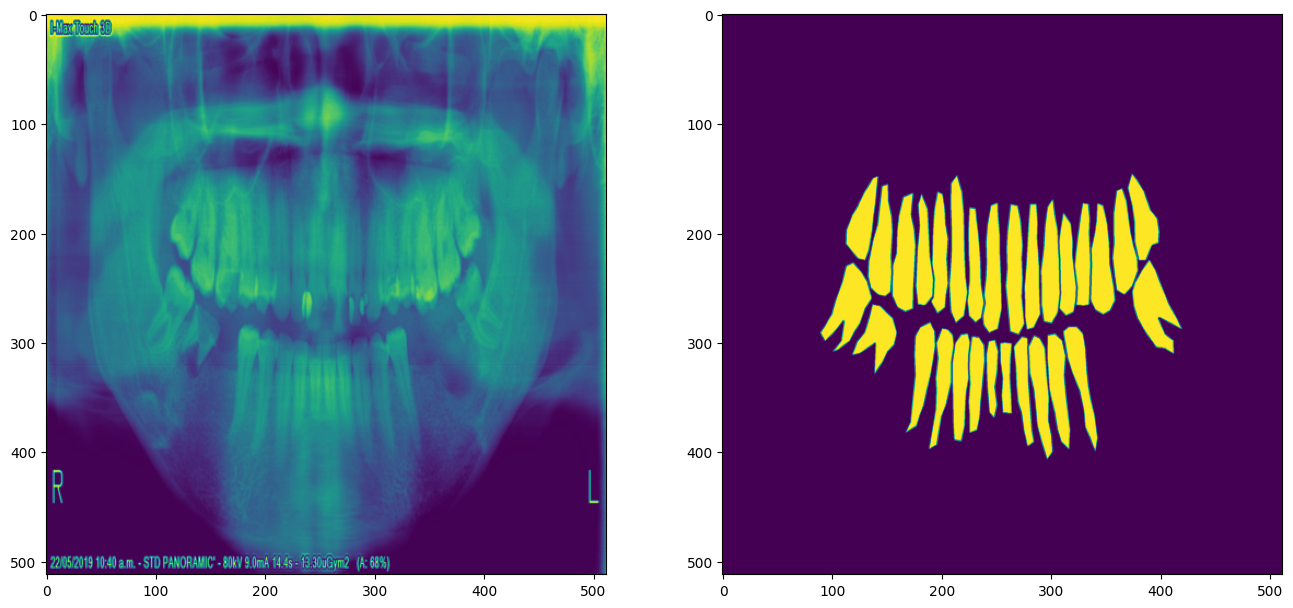

In [23]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(2, 2, 1)
plt.imshow(train_data[4]['image'].squeeze(0))
ax = fig.add_subplot(2, 2, 2)
plt.imshow(train_data[4]['annotation'].squeeze(0))
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        
        def CBR(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )
        
        self.enc1 = CBR(in_channels, 64)
        self.enc2 = CBR(64, 128)
        self.enc3 = CBR(128, 256)
        self.enc4 = CBR(256, 512)
        self.bottleneck = CBR(512, 1024)
        
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = CBR(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = CBR(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = CBR(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = CBR(128, 64)
        
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)
    
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(F.max_pool2d(enc1, kernel_size=2, stride=2))
        enc3 = self.enc3(F.max_pool2d(enc2, kernel_size=2, stride=2))
        enc4 = self.enc4(F.max_pool2d(enc3, kernel_size=2, stride=2))
        
        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc4, kernel_size=2, stride=2))
        
        # Decoder
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)
        
        # Final Convolution
        return self.final_conv(dec1)

# Example of instantiating the model
model = UNet(in_channels=1, out_channels=1)


In [25]:
def dice_index(y_pred, y_actual):
    smooth = 0.000001
    size_of_batch = y_pred.size(0)

    p1 = y_pred.view(size_of_batch, -1)
    p2 = y_actual.view(size_of_batch, -1)

    intersection = (p1 * p2).sum()

    dice = ((2.0 * intersection) + smooth) / (p1.sum() + p2.sum() + smooth)

    return dice

def dice_loss(y_predict, y_train):
    return 1 - dice_index(y_predict, y_train)

In [26]:
class BCEDiceLoss(nn.Module):
    def __init__(self):
        super(BCEDiceLoss, self).__init__()
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, y_pred, y_actual):
        bce = self.bce_loss(y_pred, y_actual)
        dice = dice_loss(y_pred, y_actual)
        return bce + dice

In [27]:
from tqdm import tqdm

def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    num_batches = len(train_loader)
    with tqdm(total=num_batches, unit='batch', position=0, leave=True) as pbar:
        for batch_idx, sample in enumerate(train_loader):
            data, target = sample['image'].to(device), sample['annotation'].to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            pbar.set_description(f'Epoch {epoch}')
            pbar.set_postfix(train_loss=running_loss / (batch_idx + 1))
            pbar.update(1)

    avg_train_loss = running_loss / num_batches
    return avg_train_loss

def validate(model, device, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for sample in val_loader:
            data, target = sample['image'].to(device), sample['annotation'].to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            
    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss


In [28]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=1, out_channels=1).to(device)
criterion = nn.BCEWithLogitsLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.000006)

In [29]:
num_epochs = 150
train_losses, val_losses = [], []

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}/{num_epochs}')
    train_loss = train(model, device, train_loader, criterion, optimizer, epoch)
    val_loss = validate(model, device, validation_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch} training loss: {train_loss:.4f}, validation loss: {val_loss:.4f}')


print("Training and validation completed.")

Epoch 1/150


Epoch 1: 100%|██████████| 84/84 [01:35<00:00,  1.14s/batch, train_loss=0.676]


Epoch 1 training loss: 0.6758, validation loss: 0.5994
Epoch 2/150


Epoch 2: 100%|██████████| 84/84 [01:38<00:00,  1.18s/batch, train_loss=0.536]


Epoch 2 training loss: 0.5357, validation loss: 0.4941
Epoch 3/150


Epoch 3: 100%|██████████| 84/84 [01:40<00:00,  1.20s/batch, train_loss=0.464]


Epoch 3 training loss: 0.4640, validation loss: 0.4407
Epoch 4/150


Epoch 4: 100%|██████████| 84/84 [01:41<00:00,  1.21s/batch, train_loss=0.43] 


Epoch 4 training loss: 0.4304, validation loss: 0.4182
Epoch 5/150


Epoch 5: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.41] 


Epoch 5 training loss: 0.4097, validation loss: 0.3998
Epoch 6/150


Epoch 6: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.394]


Epoch 6 training loss: 0.3943, validation loss: 0.3858
Epoch 7/150


Epoch 7: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.382]


Epoch 7 training loss: 0.3822, validation loss: 0.3781
Epoch 8/150


Epoch 8: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.373]


Epoch 8 training loss: 0.3727, validation loss: 0.3732
Epoch 9/150


Epoch 9: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.364]


Epoch 9 training loss: 0.3645, validation loss: 0.3646
Epoch 10/150


Epoch 10: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.357]


Epoch 10 training loss: 0.3567, validation loss: 0.3623
Epoch 11/150


Epoch 11: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.352]


Epoch 11 training loss: 0.3521, validation loss: 0.3604
Epoch 12/150


Epoch 12: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.346]


Epoch 12 training loss: 0.3456, validation loss: 0.3497
Epoch 13/150


Epoch 13: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.339]


Epoch 13 training loss: 0.3392, validation loss: 0.3503
Epoch 14/150


Epoch 14: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.335]


Epoch 14 training loss: 0.3346, validation loss: 0.3431
Epoch 15/150


Epoch 15: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.329]


Epoch 15 training loss: 0.3293, validation loss: 0.3453
Epoch 16/150


Epoch 16: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.325]


Epoch 16 training loss: 0.3250, validation loss: 0.3356
Epoch 17/150


Epoch 17: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.32] 


Epoch 17 training loss: 0.3204, validation loss: 0.3457
Epoch 18/150


Epoch 18: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.316]


Epoch 18 training loss: 0.3158, validation loss: 0.3308
Epoch 19/150


Epoch 19: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.312]


Epoch 19 training loss: 0.3119, validation loss: 0.3328
Epoch 20/150


Epoch 20: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.309]


Epoch 20 training loss: 0.3087, validation loss: 0.3300
Epoch 21/150


Epoch 21: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.304]


Epoch 21 training loss: 0.3042, validation loss: 0.3220
Epoch 22/150


Epoch 22: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.301]


Epoch 22 training loss: 0.3009, validation loss: 0.3252
Epoch 23/150


Epoch 23: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.297]


Epoch 23 training loss: 0.2973, validation loss: 0.3258
Epoch 24/150


Epoch 24: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.294]


Epoch 24 training loss: 0.2945, validation loss: 0.3197
Epoch 25/150


Epoch 25: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.29] 


Epoch 25 training loss: 0.2900, validation loss: 0.3203
Epoch 26/150


Epoch 26: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.287]


Epoch 26 training loss: 0.2874, validation loss: 0.3206
Epoch 27/150


Epoch 27: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.284]


Epoch 27 training loss: 0.2842, validation loss: 0.3127
Epoch 28/150


Epoch 28: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.281]


Epoch 28 training loss: 0.2811, validation loss: 0.3118
Epoch 29/150


Epoch 29: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.277]


Epoch 29 training loss: 0.2775, validation loss: 0.3243
Epoch 30/150


Epoch 30: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.274]


Epoch 30 training loss: 0.2741, validation loss: 0.3076
Epoch 31/150


Epoch 31: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.272]


Epoch 31 training loss: 0.2716, validation loss: 0.3088
Epoch 32/150


Epoch 32: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.269]


Epoch 32 training loss: 0.2694, validation loss: 0.3105
Epoch 33/150


Epoch 33: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.267]


Epoch 33 training loss: 0.2670, validation loss: 0.3108
Epoch 34/150


Epoch 34: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.264]


Epoch 34 training loss: 0.2640, validation loss: 0.2999
Epoch 35/150


Epoch 35: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.261]


Epoch 35 training loss: 0.2609, validation loss: 0.2959
Epoch 36/150


Epoch 36: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.258]


Epoch 36 training loss: 0.2582, validation loss: 0.2938
Epoch 37/150


Epoch 37: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.256]


Epoch 37 training loss: 0.2562, validation loss: 0.2966
Epoch 38/150


Epoch 38: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.253]


Epoch 38 training loss: 0.2532, validation loss: 0.2938
Epoch 39/150


Epoch 39: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.251]


Epoch 39 training loss: 0.2507, validation loss: 0.2919
Epoch 40/150


Epoch 40: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.248]


Epoch 40 training loss: 0.2482, validation loss: 0.2924
Epoch 41/150


Epoch 41: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.246]


Epoch 41 training loss: 0.2457, validation loss: 0.2902
Epoch 42/150


Epoch 42: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.244]


Epoch 42 training loss: 0.2438, validation loss: 0.2840
Epoch 43/150


Epoch 43: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.241]


Epoch 43 training loss: 0.2415, validation loss: 0.2888
Epoch 44/150


Epoch 44: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.238]


Epoch 44 training loss: 0.2384, validation loss: 0.2931
Epoch 45/150


Epoch 45: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.236]


Epoch 45 training loss: 0.2364, validation loss: 0.2811
Epoch 46/150


Epoch 46: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.234]


Epoch 46 training loss: 0.2339, validation loss: 0.2771
Epoch 47/150


Epoch 47: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.233]


Epoch 47 training loss: 0.2328, validation loss: 0.2826
Epoch 48/150


Epoch 48: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.23] 


Epoch 48 training loss: 0.2296, validation loss: 0.2809
Epoch 49/150


Epoch 49: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.227]


Epoch 49 training loss: 0.2272, validation loss: 0.2846
Epoch 50/150


Epoch 50: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.226]


Epoch 50 training loss: 0.2257, validation loss: 0.2719
Epoch 51/150


Epoch 51: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.223]


Epoch 51 training loss: 0.2231, validation loss: 0.2722
Epoch 52/150


Epoch 52: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.221]


Epoch 52 training loss: 0.2209, validation loss: 0.2676
Epoch 53/150


Epoch 53: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.219]


Epoch 53 training loss: 0.2191, validation loss: 0.2638
Epoch 54/150


Epoch 54: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.217]


Epoch 54 training loss: 0.2171, validation loss: 0.2727
Epoch 55/150


Epoch 55: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.215]


Epoch 55 training loss: 0.2145, validation loss: 0.2648
Epoch 56/150


Epoch 56: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.213]


Epoch 56 training loss: 0.2129, validation loss: 0.2640
Epoch 57/150


Epoch 57: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.211]


Epoch 57 training loss: 0.2110, validation loss: 0.2680
Epoch 58/150


Epoch 58: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.209]


Epoch 58 training loss: 0.2086, validation loss: 0.2624
Epoch 59/150


Epoch 59: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.206]


Epoch 59 training loss: 0.2065, validation loss: 0.2603
Epoch 60/150


Epoch 60: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.205]


Epoch 60 training loss: 0.2049, validation loss: 0.2585
Epoch 61/150


Epoch 61: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.203]


Epoch 61 training loss: 0.2035, validation loss: 0.2613
Epoch 62/150


Epoch 62: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.201]


Epoch 62 training loss: 0.2012, validation loss: 0.2542
Epoch 63/150


Epoch 63: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.2]  


Epoch 63 training loss: 0.1997, validation loss: 0.2563
Epoch 64/150


Epoch 64: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.198]


Epoch 64 training loss: 0.1975, validation loss: 0.2583
Epoch 65/150


Epoch 65: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.195]


Epoch 65 training loss: 0.1954, validation loss: 0.2530
Epoch 66/150


Epoch 66: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.194]


Epoch 66 training loss: 0.1935, validation loss: 0.2484
Epoch 67/150


Epoch 67: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.192]


Epoch 67 training loss: 0.1918, validation loss: 0.2463
Epoch 68/150


Epoch 68: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.19] 


Epoch 68 training loss: 0.1898, validation loss: 0.2456
Epoch 69/150


Epoch 69: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.188]


Epoch 69 training loss: 0.1884, validation loss: 0.2417
Epoch 70/150


Epoch 70: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.187]


Epoch 70 training loss: 0.1867, validation loss: 0.2422
Epoch 71/150


Epoch 71: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.185]


Epoch 71 training loss: 0.1851, validation loss: 0.2459
Epoch 72/150


Epoch 72: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.183]


Epoch 72 training loss: 0.1829, validation loss: 0.2416
Epoch 73/150


Epoch 73: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.181]


Epoch 73 training loss: 0.1809, validation loss: 0.2396
Epoch 74/150


Epoch 74: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.179]


Epoch 74 training loss: 0.1795, validation loss: 0.2558
Epoch 75/150


Epoch 75: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.178]


Epoch 75 training loss: 0.1782, validation loss: 0.2388
Epoch 76/150


Epoch 76: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.176]


Epoch 76 training loss: 0.1759, validation loss: 0.2358
Epoch 77/150


Epoch 77: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.175]


Epoch 77 training loss: 0.1745, validation loss: 0.2383
Epoch 78/150


Epoch 78: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.173]


Epoch 78 training loss: 0.1726, validation loss: 0.2348
Epoch 79/150


Epoch 79: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.171]


Epoch 79 training loss: 0.1713, validation loss: 0.2377
Epoch 80/150


Epoch 80: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.17] 


Epoch 80 training loss: 0.1695, validation loss: 0.2379
Epoch 81/150


Epoch 81: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.168]


Epoch 81 training loss: 0.1682, validation loss: 0.2378
Epoch 82/150


Epoch 82: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.167]


Epoch 82 training loss: 0.1666, validation loss: 0.2369
Epoch 83/150


Epoch 83: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.165]


Epoch 83 training loss: 0.1649, validation loss: 0.2302
Epoch 84/150


Epoch 84: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.163]


Epoch 84 training loss: 0.1633, validation loss: 0.2330
Epoch 85/150


Epoch 85: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.162]


Epoch 85 training loss: 0.1618, validation loss: 0.2299
Epoch 86/150


Epoch 86: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.161]


Epoch 86 training loss: 0.1613, validation loss: 0.2306
Epoch 87/150


Epoch 87: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.159]


Epoch 87 training loss: 0.1589, validation loss: 0.2290
Epoch 88/150


Epoch 88: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.157]


Epoch 88 training loss: 0.1573, validation loss: 0.2297
Epoch 89/150


Epoch 89: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.156]


Epoch 89 training loss: 0.1558, validation loss: 0.2231
Epoch 90/150


Epoch 90: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.154]


Epoch 90 training loss: 0.1543, validation loss: 0.2215
Epoch 91/150


Epoch 91: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.153]


Epoch 91 training loss: 0.1530, validation loss: 0.2203
Epoch 92/150


Epoch 92: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.152]


Epoch 92 training loss: 0.1516, validation loss: 0.2252
Epoch 93/150


Epoch 93: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.151]


Epoch 93 training loss: 0.1508, validation loss: 0.2170
Epoch 94/150


Epoch 94: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.149]


Epoch 94 training loss: 0.1491, validation loss: 0.2206
Epoch 95/150


Epoch 95: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.148]


Epoch 95 training loss: 0.1480, validation loss: 0.2190
Epoch 96/150


Epoch 96: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.147]


Epoch 96 training loss: 0.1467, validation loss: 0.2191
Epoch 97/150


Epoch 97: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.145]


Epoch 97 training loss: 0.1454, validation loss: 0.2152
Epoch 98/150


Epoch 98: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.144]


Epoch 98 training loss: 0.1440, validation loss: 0.2108
Epoch 99/150


Epoch 99: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.143]


Epoch 99 training loss: 0.1425, validation loss: 0.2172
Epoch 100/150


Epoch 100: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.141]


Epoch 100 training loss: 0.1413, validation loss: 0.2151
Epoch 101/150


Epoch 101: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.14] 


Epoch 101 training loss: 0.1395, validation loss: 0.2124
Epoch 102/150


Epoch 102: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.138]


Epoch 102 training loss: 0.1383, validation loss: 0.2109
Epoch 103/150


Epoch 103: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.137]


Epoch 103 training loss: 0.1374, validation loss: 0.2086
Epoch 104/150


Epoch 104: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.136]


Epoch 104 training loss: 0.1356, validation loss: 0.2086
Epoch 105/150


Epoch 105: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.135]


Epoch 105 training loss: 0.1352, validation loss: 0.2123
Epoch 106/150


Epoch 106: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.134]


Epoch 106 training loss: 0.1336, validation loss: 0.2066
Epoch 107/150


Epoch 107: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.133]


Epoch 107 training loss: 0.1327, validation loss: 0.2092
Epoch 108/150


Epoch 108: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.131]


Epoch 108 training loss: 0.1312, validation loss: 0.2053
Epoch 109/150


Epoch 109: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.13] 


Epoch 109 training loss: 0.1296, validation loss: 0.2073
Epoch 110/150


Epoch 110: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.128]


Epoch 110 training loss: 0.1284, validation loss: 0.2058
Epoch 111/150


Epoch 111: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.127]


Epoch 111 training loss: 0.1273, validation loss: 0.2023
Epoch 112/150


Epoch 112: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.126]


Epoch 112 training loss: 0.1261, validation loss: 0.2119
Epoch 113/150


Epoch 113: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.125]


Epoch 113 training loss: 0.1248, validation loss: 0.2028
Epoch 114/150


Epoch 114: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.124]


Epoch 114 training loss: 0.1238, validation loss: 0.2085
Epoch 115/150


Epoch 115: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.122]


Epoch 115 training loss: 0.1225, validation loss: 0.1985
Epoch 116/150


Epoch 116: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.121]


Epoch 116 training loss: 0.1212, validation loss: 0.1968
Epoch 117/150


Epoch 117: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.12] 


Epoch 117 training loss: 0.1202, validation loss: 0.2004
Epoch 118/150


Epoch 118: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.119]


Epoch 118 training loss: 0.1194, validation loss: 0.2002
Epoch 119/150


Epoch 119: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.118]


Epoch 119 training loss: 0.1183, validation loss: 0.1974
Epoch 120/150


Epoch 120: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.117]


Epoch 120 training loss: 0.1169, validation loss: 0.2009
Epoch 121/150


Epoch 121: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.116]


Epoch 121 training loss: 0.1158, validation loss: 0.1995
Epoch 122/150


Epoch 122: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.115]


Epoch 122 training loss: 0.1150, validation loss: 0.1959
Epoch 123/150


Epoch 123: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.114]


Epoch 123 training loss: 0.1142, validation loss: 0.1997
Epoch 124/150


Epoch 124: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.114]


Epoch 124 training loss: 0.1142, validation loss: 0.1953
Epoch 125/150


Epoch 125: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.112]


Epoch 125 training loss: 0.1125, validation loss: 0.1904
Epoch 126/150


Epoch 126: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.111]


Epoch 126 training loss: 0.1107, validation loss: 0.1916
Epoch 127/150


Epoch 127: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.11] 


Epoch 127 training loss: 0.1096, validation loss: 0.1915
Epoch 128/150


Epoch 128: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.109]


Epoch 128 training loss: 0.1088, validation loss: 0.1899
Epoch 129/150


Epoch 129: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.108]


Epoch 129 training loss: 0.1080, validation loss: 0.1923
Epoch 130/150


Epoch 130: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.107]


Epoch 130 training loss: 0.1072, validation loss: 0.1886
Epoch 131/150


Epoch 131: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.106]


Epoch 131 training loss: 0.1058, validation loss: 0.1911
Epoch 132/150


Epoch 132: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.105]


Epoch 132 training loss: 0.1048, validation loss: 0.1878
Epoch 133/150


Epoch 133: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.104]


Epoch 133 training loss: 0.1044, validation loss: 0.1845
Epoch 134/150


Epoch 134: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.103]


Epoch 134 training loss: 0.1029, validation loss: 0.1927
Epoch 135/150


Epoch 135: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.102]


Epoch 135 training loss: 0.1020, validation loss: 0.1878
Epoch 136/150


Epoch 136: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.101]


Epoch 136 training loss: 0.1011, validation loss: 0.1885
Epoch 137/150


Epoch 137: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.101] 


Epoch 137 training loss: 0.1010, validation loss: 0.1807
Epoch 138/150


Epoch 138: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.1]  


Epoch 138 training loss: 0.1001, validation loss: 0.1806
Epoch 139/150


Epoch 139: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0988]


Epoch 139 training loss: 0.0988, validation loss: 0.1898
Epoch 140/150


Epoch 140: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0979]


Epoch 140 training loss: 0.0979, validation loss: 0.1894
Epoch 141/150


Epoch 141: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0969]


Epoch 141 training loss: 0.0969, validation loss: 0.1784
Epoch 142/150


Epoch 142: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0959]


Epoch 142 training loss: 0.0959, validation loss: 0.1830
Epoch 143/150


Epoch 143: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.095] 


Epoch 143 training loss: 0.0950, validation loss: 0.1792
Epoch 144/150


Epoch 144: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0952]


Epoch 144 training loss: 0.0952, validation loss: 0.1860
Epoch 145/150


Epoch 145: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0935]


Epoch 145 training loss: 0.0935, validation loss: 0.1809
Epoch 146/150


Epoch 146: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0925]


Epoch 146 training loss: 0.0925, validation loss: 0.1922
Epoch 147/150


Epoch 147: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0914]


Epoch 147 training loss: 0.0914, validation loss: 0.1824
Epoch 148/150


Epoch 148: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0905]


Epoch 148 training loss: 0.0905, validation loss: 0.1794
Epoch 149/150


Epoch 149: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.0896]


Epoch 149 training loss: 0.0896, validation loss: 0.1808
Epoch 150/150


Epoch 150: 100%|██████████| 84/84 [01:42<00:00,  1.22s/batch, train_loss=0.089] 


Epoch 150 training loss: 0.0890, validation loss: 0.1760
Training and validation completed.


In [30]:
torch.save(model.state_dict(), 'unet_model.pth')

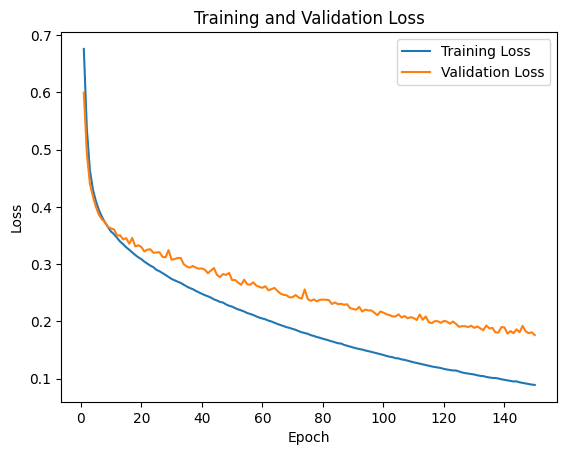

In [31]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [33]:
def im_converterX(tensor):
    image = tensor.cpu().clone().detach().numpy() 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
    # print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # unnormalizing the image # this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterX1(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image=image.squeeze(0) 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
 # print(image.shape)
    # image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # unnormalizing the image # this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterY(tensor):
    image = tensor.cpu().clone().detach().numpy() 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
    # print(image.shape)
    image = image * np.array((1, 1, 1)) # unnormalizing the image  not needed# this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterY1(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image=image.squeeze(0) 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
 # print(image.shape)
    image = image * np.array((1, 1, 1)) # unnormalizing the image  not needed# this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

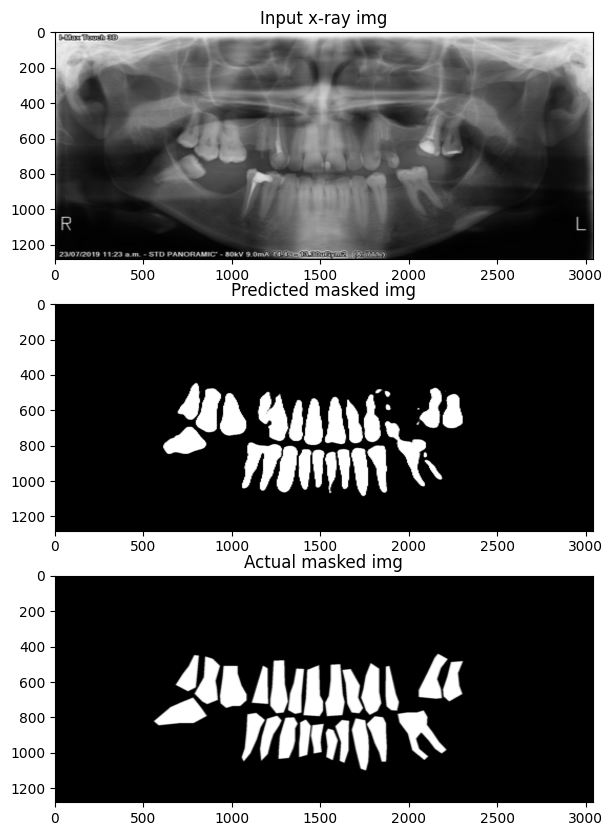

In [45]:
pig = plt.figure(figsize = (16, 10))
dim=3040,1280
for i, sample in enumerate(validation_loader):
    Xs, Ys = sample["image"], sample["annotation"]
    
    a = pig.add_subplot(3, 1, 1)
    imgx=im_converterX(Xs[0])
    imgx=cv2.resize(imgx, dim, interpolation = cv2.INTER_AREA)
    plt.title('Input x-ray img')
    plt.imshow(imgx)

    Xs = Xs.to("cuda")
    a = pig.add_subplot(3, 1, 2)
    output_img=im_converterY(model(Xs)[0])
    output_img=cv2.resize(output_img, dim, interpolation = cv2.INTER_AREA)
    plt.title('Predicted masked img')
    plt.imshow(output_img)

    a = pig.add_subplot(3, 1, 3)
    imgy=im_converterY(Ys[0])
    imgy=cv2.resize(imgy, dim, interpolation = cv2.INTER_AREA)
    plt.title('Actual masked img')
    plt.imshow(imgy)

    break
plt.show()

In [46]:
test_set_size = 0.5
class dset(Dataset):
    def __init__(self, root_dir, train=True,test=True,transformX = None, transformY = None):
        self.pixel_file = pd.read_csv(os.path.join(root_dir, 'sample.csv'))
        self.root_dir = root_dir
        self.transformX = transformX
        self.transformY = transformY
        self.train = train
        self.test = test
        
        # split the dataset to train and rest
        # split the rest to validation and test
        self.train_data, self.test_data = train_test_split(self.pixel_file, test_size = test_set_size, random_state = 5)
        # self.validation_data, self.test_data = train_test_split(self.rest_data, test_size = test_set_size, random_state = 5)

    def __len__(self):
        if self.train:
          length = len(self.train_data)
        elif self.test:
          length = len(self.test_data)
        else:
          length = len(self.validation_data)
        return length
    
    def __getitem__(self, index):
        if self.train:
          imx_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0].replace('.png','_m.png'))
        elif self.test:
          imx_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0].replace('.png','_m.png'))
        else:
          imx_name = os.path.join(self.root_dir, 'original_img', self.validation_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.validation_data.iloc[index, 0].replace('.png','_m.png'))
        
        imx = Image.open(imx_name)
        imy = Image.open(imy_name).convert('L')

        if self.transformX:
            imx = self.transformX(imx)
            imy = self.transformY(imy)
      
        sample = {'image': imx, 'annotation': imy}
        return sample

In [47]:
tx_X = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor(),
                           transforms.Normalize((0.5,), (0.5,))
                              ])
tx_Y = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor()
                              ])
train_data = dset('/kaggle/working/data', train=True, test=False, transformX = tx_X, transformY = tx_Y)
# validation_data = dset('/content/data', train=False,test=False,transformX = tx_X, transformY = tx_Y)
test_data = dset('/kaggle/working/data', train=False, test=True,transformX = tx_X, transformY = tx_Y)

train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True, num_workers=2)
# validation_loader = DataLoader(dataset=validation_data, batch_size=2, shuffle=True, num_workers=1)
test_loader = DataLoader(dataset=test_data, batch_size=5, shuffle=True, num_workers=1)

In [57]:
def dice_index(y_pred, y_actual, smooth=0.000001):
    y_pred = torch.sigmoid(y_pred)  # Apply sigmoid to get probabilities
    y_pred = (y_pred > 0.5).float()  # Binarize predictions
    
    intersection = (y_pred * y_actual).sum(dim=(1, 2, 3))
    union = y_pred.sum(dim=(1, 2, 3)) + y_actual.sum(dim=(1, 2, 3))
    
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice  # Return Dice score per sample

def avg_dice_index(dataloader, model, device): 
    dice_sum = 0.0
    model.eval()
    with torch.no_grad():
        for sample_batched in dataloader:
            X = sample_batched['image'].to(device)
            y = sample_batched['annotation'].to(device)
            
            y_pred = model(X)
            dice_scores = dice_index(y_pred, y)
            dice_sum += dice_scores.sum().item()
    
    avg_dice = dice_sum / len(dataloader.dataset)  # Compute the average Dice score
    return avg_dice

# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

test_score = avg_dice_index(test_loader, model, device)

print('Average Dice Score is:', test_score)
print('Average Dice Loss is:', 1 - test_score)

Average Dice Score is: 0.8868874427068194
Average Dice Loss is: 0.1131125572931806


In [63]:
import torch

def iou_index(y_pred, y_actual, smooth=0.000001):
    y_pred = torch.sigmoid(y_pred)  # Apply sigmoid to get probabilities
    y_pred = (y_pred > 0.5).float()  # Binarize predictions
    
    intersection = (y_pred * y_actual).sum(dim=(1, 2, 3))
    union = y_pred.sum(dim=(1, 2, 3)) + y_actual.sum(dim=(1, 2, 3)) - intersection
    
    iou = (intersection + smooth) / (union + smooth)
    return iou  # Return IoU score per sample

def avg_iou_index(dataloader, model, device): 
    iou_sum = 0.0
    model.eval()
    with torch.no_grad():
        for sample_batched in dataloader:
            X = sample_batched['image'].to(device)
            y = sample_batched['annotation'].to(device)
            
            y_pred = model(X)
            iou_scores = iou_index(y_pred, y)
            iou_sum += iou_scores.sum().item()
    
    avg_iou = iou_sum / len(dataloader.dataset)  # Compute the average IoU score
    return avg_iou

# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

test_score = avg_iou_index(test_loader, model, device)

print('Average IoU Score is:', test_score)
print('Average IoU Loss is:', 1 - test_score)

Average IoU Score is: 0.8065399509608546
Average IoU Loss is: 0.19346004903914538


0


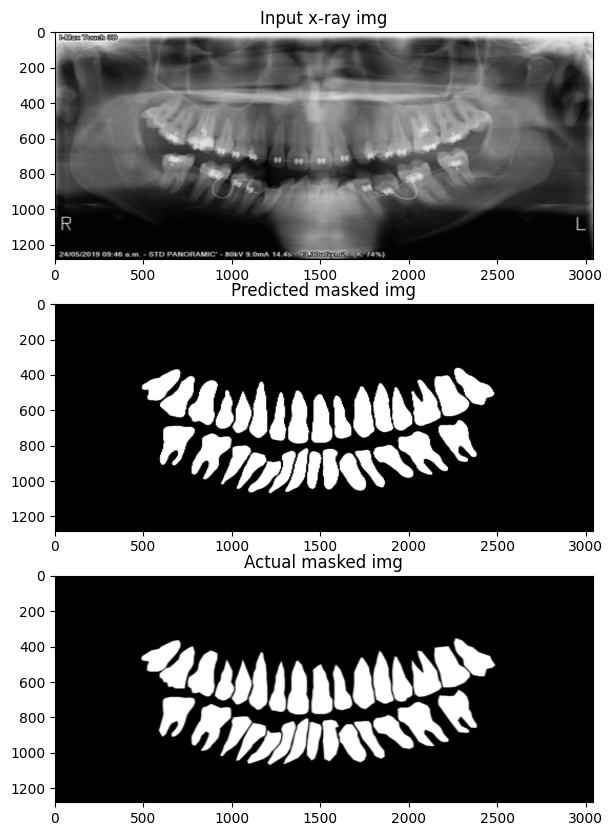

In [56]:
pig = plt.figure(figsize = (16, 10))
dim=3040,1280

for i, sample in enumerate(test_loader):
    print(i)
    Xs, Ys = sample["image"], sample["annotation"]
    
    a = pig.add_subplot(3, 1, 1)
    imgx=im_converterX(Xs[0])
    imgx=cv2.resize(imgx, dim, interpolation = cv2.INTER_AREA)
    plt.title('Input x-ray img')
    plt.imshow(imgx)

    Xs = Xs.to("cuda")
    a = pig.add_subplot(3, 1, 2)
    output_img=im_converterY(model(Xs)[0])
    output_img=cv2.resize(output_img, dim, interpolation = cv2.INTER_AREA)
    plt.title('Predicted masked img')
    plt.imshow(output_img)

    a = pig.add_subplot(3, 1, 3)
    imgy=im_converterY(Ys[0])
    imgy=cv2.resize(imgy, dim, interpolation = cv2.INTER_AREA)
    plt.title('Actual masked img')
    plt.imshow(imgy)

    break
plt.show()

In [37]:
# def avg_dice_index(dataloader): 
#     dice = 0.0
#     model.eval()
#     with torch.no_grad():
#         for ith_batch, sample_batched in enumerate(dataloader):
  
#             X_train = sample_batched['image'].to('cuda')
#             y_train = sample_batched['annotation'].to('cuda')
            
#             y_predict = (model(X_train) + 0.5).int().float()
            
#             dice += dice_index(y_predict, y_train)
            
#     print(len(dataloader))
#     avg_dice = dice / len(dataloader)
    
#     return avg_dice.item()

In [42]:
# test_score=avg_dice_index(test_loader)

60


In [43]:
# print('Avergae Dice Score is:',test_score)
# print('Avergae Dice Loss is:',1-test_score)

Avergae Dice Score is: -8.847112655639648
Avergae Dice Loss is: 9.847112655639648


In [59]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=ca9a26fa16cc64ff19d7d1e3c8e2415e14065dca935cddfe268ee7906c36bbab
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [60]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
from scipy.spatial import distance as dist

from skimage.segmentation import watershed
from skimage.measure import label
from skimage.color import label2rgb
from skimage import measure

In [61]:
def ConnectedComp(img):
  # Load in image, convert to gray scale, and Otsu's threshold
  kernel =(np.ones((3,3), dtype=np.float32))
  # print(img.dtype)
  image=cv2.resize(img.astype(np.float32),(3040,1280))
  image=cv2.morphologyEx(image, cv2.MORPH_OPEN,kernel)
  
  # sharpen=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
  # image=cv2.filter2D(image,-1,sharpen)
  
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # print(gray)
  grayy = (gray*255*10).astype(np.uint8)
  print(grayy)

  thresh = cv2.threshold(grayy, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  # print(thresh)
  erosion = cv2.erode(thresh,kernel,iterations=3) #,iterations=2
  #gradient, aka the contours
  gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

  ret,markers=cv2.connectedComponents(erosion,connectivity=8)
  new = watershed(erosion,markers,mask=thresh)
  RGB = label2rgb(new, bg_label=0)


  return erosion,gradient,RGB
  # return erosion
erosion,gradient,RGB=ConnectedComp(output_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


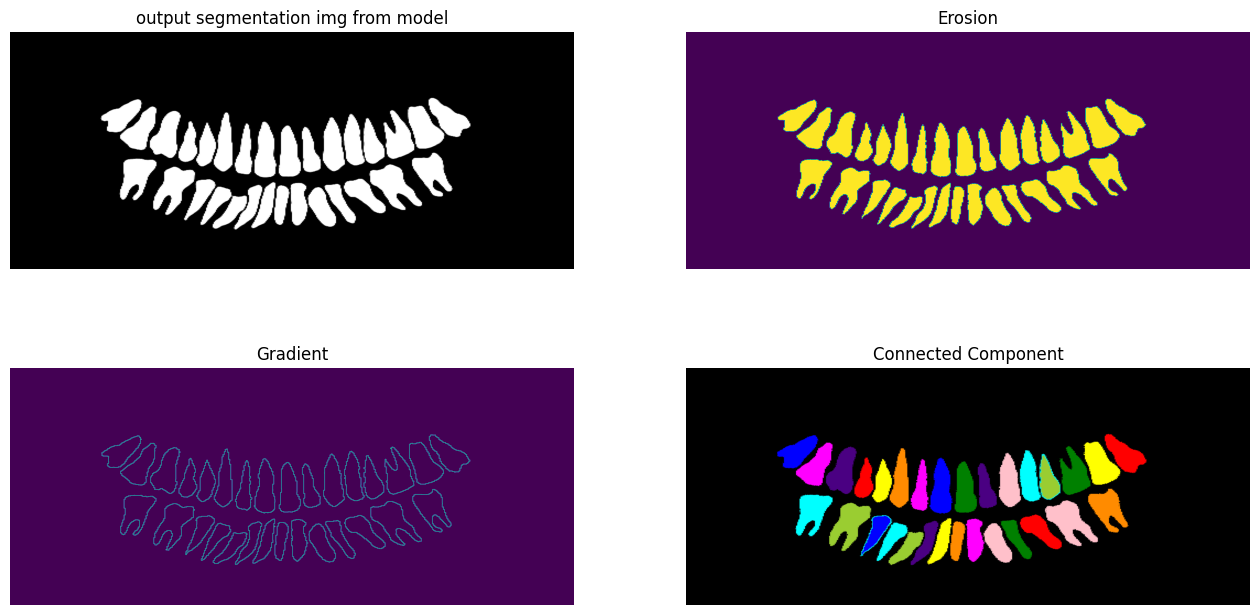

In [62]:
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(2, 2, 1) 
plt.title('output segmentation img from model')
plt.axis('off')
plt.imshow(output_img)

ax = fig.add_subplot(2, 2, 2) 
plt.title('Erosion')
plt.axis('off')
plt.imshow(erosion)

ax = fig.add_subplot(2,2,3) 
plt.title('Gradient')
plt.axis('off')
plt.imshow(gradient)

ax = fig.add_subplot(2,2,4) 
plt.title('Connected Component')
plt.axis('off')
plt.imshow(RGB)

plt.show()